In [32]:
import numpy as np 	
import matplotlib.pyplot as plt
import pandas as pd	
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
df=pd.read_csv(r"C:\Users\sandh\OneDrive\Desktop\python\july8th_joblit _frontend_linaer regression_projectheight_weightpredictions\SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [35]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [36]:
#converting weight pounds to kg
df['Weight_kg']=df['Weight(Pounds)']*0.453592

In [37]:
df

,Index,Height(Inches),Weight(Pounds),Weight_kg
0,1,65.78331,112.9925,51.252494
1,2,71.51521,136.4873,61.909547
2,3,69.39874,153.0269,69.411778
3,4,68.21660,142.3354,64.562199
4,5,67.78781,144.2971,65.452010
...,...,...,...,...
24995,24996,69.50215,118.0312,53.538008
24996,24997,64.54826,120.1932,54.518674
24997,24998,64.69855,118.2655,53.644285
24998,24999,67.52918,132.2682,59.995797


In [38]:
# Convert inches to the desired format (feet.inches)
df['Height(Feet)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10
df.describe() 

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [39]:
df

,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet)
0,1,65.78331,112.9925,51.252494,5.578331
1,2,71.51521,136.4873,61.909547,6.151521
2,3,69.39874,153.0269,69.411778,5.939874
3,4,68.21660,142.3354,64.562199,5.821660
4,5,67.78781,144.2971,65.452010,5.778781
...,...,...,...,...,...
24995,24996,69.50215,118.0312,53.538008,5.950215
24996,24997,64.54826,120.1932,54.518674,5.454826
24997,24998,64.69855,118.2655,53.644285,5.469855
24998,24999,67.52918,132.2682,59.995797,5.752918


In [40]:
drop_col=['Index' ,'Height(Inches)' ,'Weight(Pounds)']
df=df.drop(columns=drop_col,axis=1)
#df.sample()
#df.sample(3)

In [41]:
df

,Weight_kg,Height(Feet)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781
...,...,...
24995,53.538008,5.950215
24996,54.518674,5.454826
24997,53.644285,5.469855
24998,59.995797,5.752918


In [42]:
#df.sample(4)
df.shape
df.isna().any()  # check null values 
df.dtypes
df.corr()  
df.describe()

,Weight_kg,Height(Feet)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


KeyError: 'Weight_kg)'

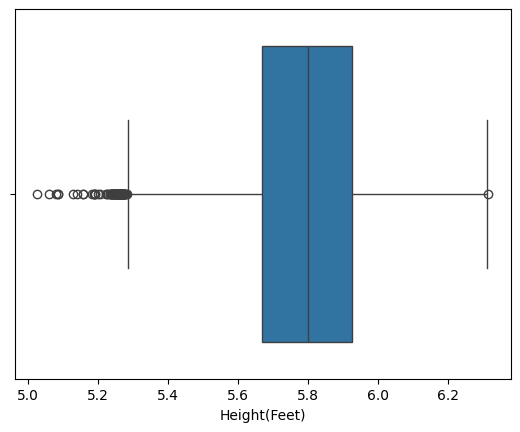

In [44]:
# checking outliers
sns.boxplot(x=df['Height(Feet)'])
sns.boxplot(x=df['Weight_kg)'])
plt.show()

In [45]:
df

,Weight_kg,Height(Feet)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781
...,...,...
24995,53.538008,5.950215
24996,54.518674,5.454826
24997,53.644285,5.469855
24998,59.995797,5.752918


In [46]:
X=df['Height(Feet)']
y=df['Weight_kg']

In [47]:
df

,Weight_kg,Height(Feet)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781
...,...,...
24995,53.538008,5.950215
24996,54.518674,5.454826
24997,53.644285,5.469855
24998,59.995797,5.752918


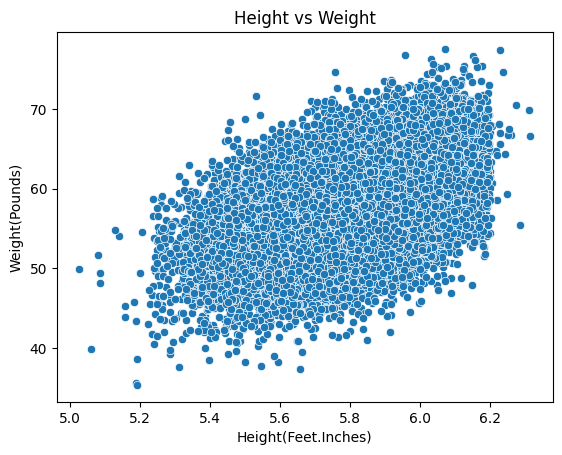

In [48]:
sns.scatterplot(x=X,y=y)
plt.title('Height vs Weight')
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight(Pounds)')
plt.show()

In [49]:

X=df.iloc[:,1]
y=df.iloc[:,0]
df.columns[1]
X

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet), Length: 25000, dtype: float64

In [50]:
# data scaling Preprocessing data 
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X.values.reshape(-1,1))
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [51]:
# split and train the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print('Shape of training  data')
print(X_train.shape)
print(y_train.shape)

print('Shape of testing data')
print(X_test.shape)
print(y_test.shape)

Shape of training  data
(20000,)
(20000,)
Shape of testing data
(5000,)
(5000,)


In [52]:
#linear regression model X should be 2d array so we are reshaping it to 2d array

# Reshape training data
X_train_2d = X_train.values.reshape(-1, 1)
y_train_2d = y_train.values.reshape(-1, 1)

X_train_2d

array([[5.794897],
       [5.65546 ],
       [6.005212],
       ...,
       [5.839347],
       [5.929711],
       [5.712804]])

In [53]:
# Reshape testing data
X_test_2d = X_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

In [54]:
print("Shape of training data (X):", X_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", X_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [55]:
lr=LinearRegression()
lr

LinearRegression()

In [56]:
lr.fit(X_train_2d,y_train_2d)

LinearRegression()

In [57]:
# predict the output 
y_pred=lr.predict(X_test_2d)
y_pred

array([[58.30995889],
       [57.55379225],
       [57.21368631],
       ...,
       [58.51984441],
       [56.40629104],
       [61.38327545]])

In [58]:
y_test_2d

array([[60.91082852],
       [50.78715403],
       [61.68266066],
       ...,
       [64.04079475],
       [58.75200275],
       [61.1227467 ]])

In [59]:
y_test_2d[:10]
(mean_squared_error(y_pred,y_test_2d)**0.5)

np.float64(4.607921420484786)

In [60]:
### final model
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression()
# Fit the model to the entire training data
final_model.fit(X_train_2d, y_train_2d)

LinearRegression()

In [62]:
import pickle

# Define the filename for the pickle file
filename = 'model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])
